In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import scirpy as ir
from matplotlib import pyplot as plt
import glob
import collections

In [2]:
metadata = pd.read_csv("/home/srashmi/Documents/tonsil_atlas_citeseq_vdj_20210505/01-cellranger_mapping/data/tonsil_atlas_metadata.csv")
df = pd.DataFrame(metadata, columns= ['subproject', 'gem_id']).drop_duplicates()
subproject_gem_id_list = df.values.tolist()
print(subproject_gem_id_list)

[['BCLLATLAS_33', 'mLuLpVxi_v0fLyotc'], ['BCLLATLAS_33', 'ifZOgenn_TpMNTvBa'], ['BCLLATLAS_38', 'WToIzInl_LudU7hVX'], ['BCLLATLAS_38', 'B20O1bh7_VmM99YZJ'], ['BCLLATLAS_38', 'rdFRFhrU_ZdYeOZlf'], ['BCLLATLAS_40', 'CfdzDgHe_IMOTbrIP'], ['BCLLATLAS_40', 'uqJAc4r9_BYScOzxA'], ['BCLLATLAS_40', 'ujxNn2kq_lG2VLlYd'], ['BCLLATLAS_40', 'pseMjZsU_qgZNOhOQ'], ['BCLLATLAS_40', 'LxBTpkPO_8TcNpBg4'], ['BCLLATLAS_46', 'SOJZt9kY_qpnv20QN'], ['BCLLATLAS_46', 'HjqdPU0E_aGDmEY5F'], ['BCLLATLAS_46', 'XV1SLOR2_HRF5D9A3'], ['BCLLATLAS_46', 'BZEECBEG_GXkc6Q1y'], ['BCLLATLAS_46', 'KETfaLdx_Ub1mtE13']]


In [3]:
adatas = []
for sample_info_list in subproject_gem_id_list:
	subproject = sample_info_list[0]
	gem_id = sample_info_list[1]
	sample = subproject + "_" + gem_id    
	bcr_file="/home/srashmi/Documents/tonsil_atlas_citeseq_vdj_20210505/01-cellranger_mapping/projects/"+subproject+"/jobs/"+gem_id+"/"+gem_id+"/outs/per_sample_outs/"+gem_id+"/vdj_b/filtered_contig_annotations.csv"	
	ad = pd.read_csv(bcr_file)
	ad["barcode"] = sample + "_" + ad["barcode"]
	adatas.append(ad)

adatas = pd.concat(adatas)
adatas.to_csv("bcr_bcll.csv")
adata_bcr = ir.io.read_10x_vdj("bcr_bcll.csv")

... storing 'IR_VJ_1_cdr3' as categorical
... storing 'IR_VJ_2_cdr3' as categorical
... storing 'IR_VDJ_1_cdr3' as categorical
... storing 'IR_VDJ_2_cdr3' as categorical
... storing 'IR_VJ_1_cdr3_nt' as categorical
... storing 'IR_VJ_2_cdr3_nt' as categorical
... storing 'IR_VDJ_1_cdr3_nt' as categorical
... storing 'IR_VDJ_2_cdr3_nt' as categorical
... storing 'IR_VJ_1_junction_ins' as categorical
... storing 'IR_VJ_2_junction_ins' as categorical
... storing 'IR_VDJ_1_junction_ins' as categorical
... storing 'IR_VDJ_2_junction_ins' as categorical


In [4]:
gex_file="objects/GCBC_tonsil_cite_seq_annotated.h5ad"	
adata = sc.read_h5ad(gex_file)
adata.var_names_make_unique()
ir.pp.merge_with_ir(adata, adata_bcr)
adata

... storing 'orig.ident' as categorical
... storing 'sample' as categorical
... storing 'subproject' as categorical
... storing 'gemid' as categorical
... storing 'donor_id' as categorical
... storing 'genotype_based_doublet_flag' as categorical
... storing 'genotype_based_unassigned_flag' as categorical
... storing 'scrublet_predicted_doublet' as categorical
... storing 'inkt_evidence' as categorical
... storing 'mait_evidence' as categorical
... storing 'tcr_flag' as categorical
... storing 'bcr_flag' as categorical
... storing 'Phase' as categorical
... storing 'annotation' as categorical
... storing 'repertoire_flag' as categorical
... storing 'GCBC_annotation_level_5' as categorical
... storing 'multi_chain' as categorical


AnnData object with n_obs × n_vars = 14429 × 192
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_ADT', 'nFeature_ADT', 'sample', 'subproject', 'gemid', 'donor_id', 'genotype_based_doublet_flag', 'genotype_based_unassigned_flag', 'scrublet_doublet_scores', 'scrublet_predicted_doublet', 'inkt_evidence', 'mait_evidence', 'tcr_flag', 'bcr_flag', 'percent.mt', 'log10GenesPerUMI', 'S.Score', 'G2M.Score', 'Phase', 'RNA.weight', 'ADT.weight', 'wsnn_res.0.1', 'wsnn_res.0.5', 'wsnn_res.1', 'wsnn_res.1.5', 'wsnn_res.2', 'seurat_clusters', 'annotation', 'annotation_prob', 'UMAP1', 'UMAP2', 'repertoire_flag', 'GCBC_annotation_level_5', 'GCBC_annotation_probability', 'GCBC_UMAP1', 'GCBC_UMAP2', 'IR_VJ_1_locus', 'IR_VJ_2_locus', 'IR_VDJ_1_locus', 'IR_VDJ_2_locus', 'IR_VJ_1_cdr3', 'IR_VJ_2_cdr3', 'IR_VDJ_1_cdr3', 'IR_VDJ_2_cdr3', 'IR_VJ_1_cdr3_nt', 'IR_VJ_2_cdr3_nt', 'IR_VDJ_1_cdr3_nt', 'IR_VDJ_2_cdr3_nt', 'IR_VJ_1_expr', 'IR_VJ_2_expr', 'IR_VDJ_1_expr', 'IR_VDJ_2_expr', 'IR_VJ_1_expr_raw

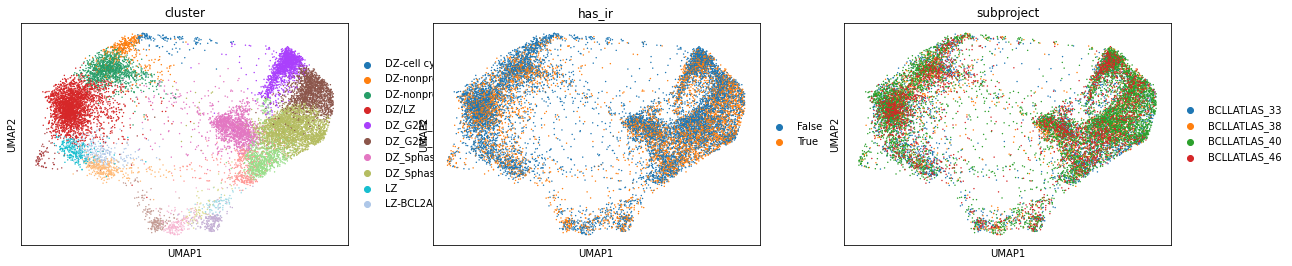

In [5]:
adata.obs["cluster"] = adata.obs['GCBC_annotation_level_5']
adata.obs['cluster'] = adata.obs['cluster'].astype('category').values
adata.obsm['umap'] = np.array(adata.obs[['GCBC_UMAP1', 'GCBC_UMAP2']])
sc.pl.umap(adata, color=["cluster", "has_ir","subproject"])

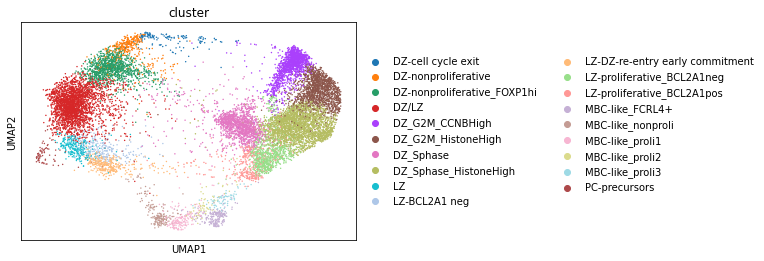

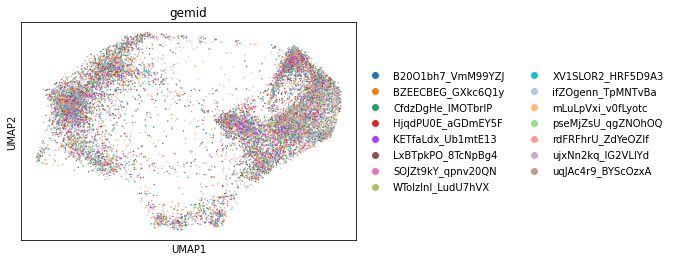

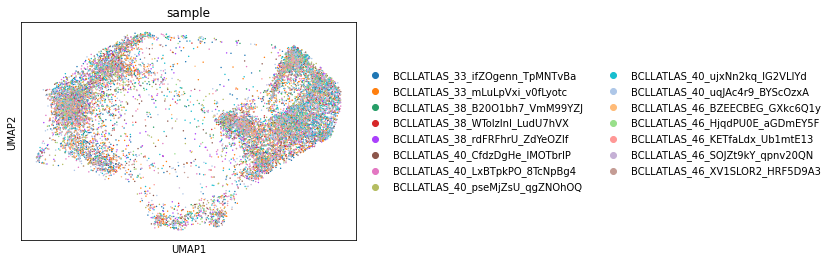

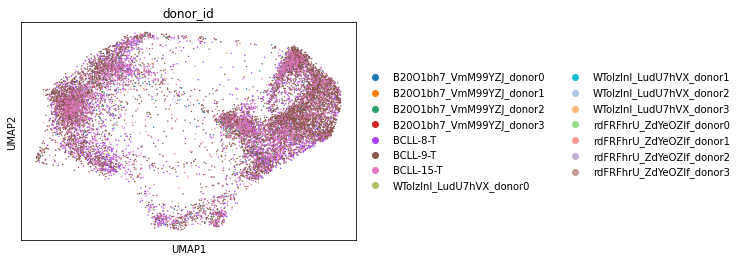

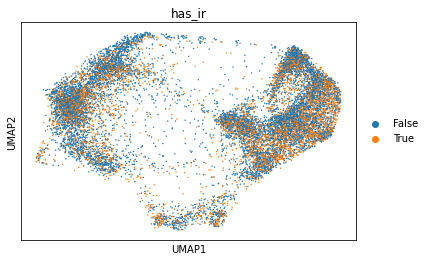

In [6]:
sc.pl.umap(adata, color=['cluster'])
sc.pl.umap(adata, color=["gemid"])
sc.pl.umap(adata, color=["sample"])
sc.pl.umap(adata, color=["donor_id"])
sc.pl.umap(adata, color=["has_ir"])

... storing 'receptor_type' as categorical
... storing 'receptor_subtype' as categorical
... storing 'chain_pairing' as categorical


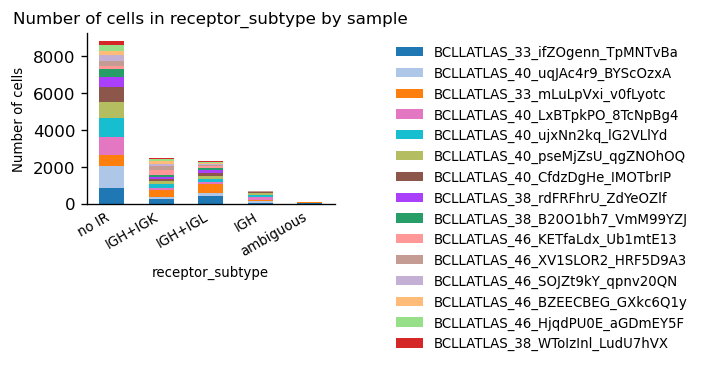

In [7]:
ir.tl.chain_qc(adata)
ir.pl.group_abundance(adata, groupby="receptor_subtype", target_col="sample")
plt.show()

In [8]:
print(
    "Fraction of cells with more than one pair of BCRs: {:.2f}".format(
        np.sum(
            adata.obs["chain_pairing"].isin(
                ["extra VJ", "extra VDJ", "two full chains"]
            )
        )
        / adata.n_obs
    )
)

Fraction of cells with more than one pair of BCRs: 0.01


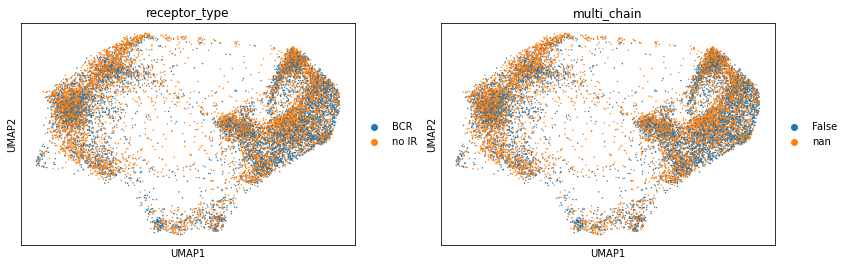

/home/srashmi/anaconda3/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


In [9]:
sc.pl.umap(adata, color=['receptor_type',"multi_chain"])
adata = adata[adata.obs["multi_chain"] != "True", :].copy() #Remove the ones with multi-chain as they can be douplets
plt.show()

Number of BCR (with Doublets) : 5608
Number of BCR (without Doublets) : 5608


Trying to set attribute `.obs` of view, copying.
... storing 'receptor_type' as categorical
... storing 'receptor_subtype' as categorical
... storing 'chain_pairing' as categorical


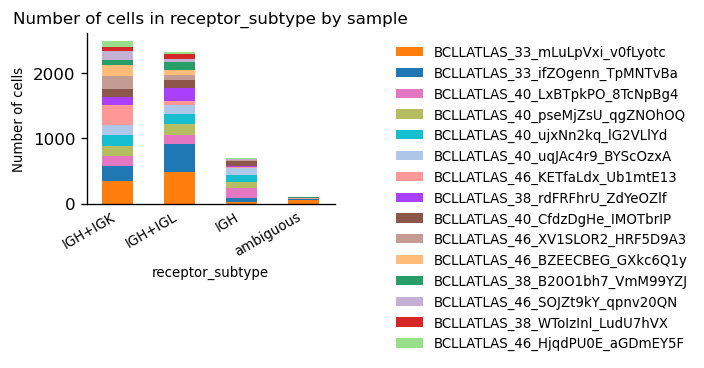

In [10]:
BCR_adata_with_doublets = adata[adata.obs['receptor_type'] == "BCR"]
BCR_adata = BCR_adata_with_doublets[(BCR_adata_with_doublets.obs['genotype_based_doublet_flag'] != "T") & (BCR_adata_with_doublets.obs['genotype_based_unassigned_flag'] != "T") & (BCR_adata_with_doublets.obs['scrublet_predicted_doublet'] != "True")]
print("Number of BCR (with Doublets) : "+str(len(BCR_adata_with_doublets.obs)))
print("Number of BCR (without Doublets) : "+str(len(BCR_adata.obs)))
ir.tl.chain_qc(BCR_adata)
ir.pl.group_abundance(BCR_adata, groupby="receptor_subtype", target_col="sample")
plt.show()

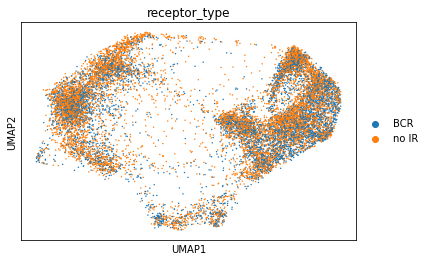

In [11]:
sc.pl.umap(adata, color=['receptor_type'])

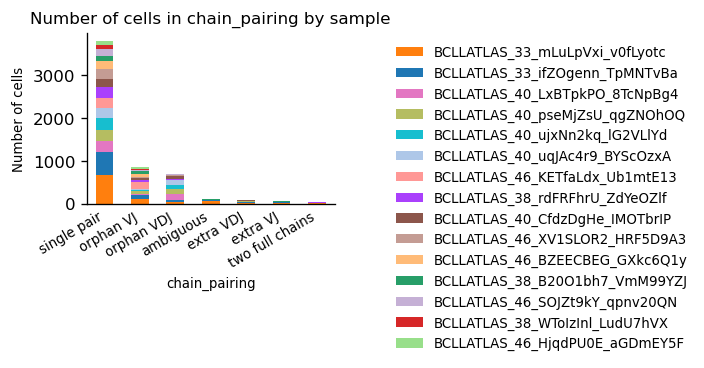

In [12]:
ir.pl.group_abundance(BCR_adata, groupby="chain_pairing", target_col="sample")
plt.show()

In [13]:
print(
    "Fraction of cells with more than one pair of BCRs: {:.2f}".format(
        np.sum(
            BCR_adata.obs["chain_pairing"].isin(
                ["extra VJ", "extra VDJ", "two full chains"]
            )
        )
        / BCR_adata.n_obs
    )
)

Fraction of cells with more than one pair of BCRs: 0.03


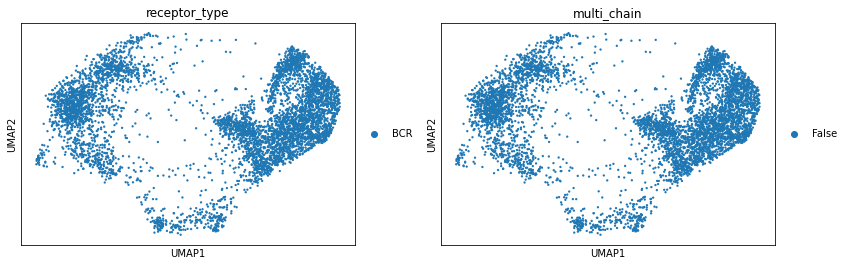

In [14]:
sc.pl.umap(BCR_adata, color=["receptor_type","multi_chain"])
BCR_adata = BCR_adata[BCR_adata.obs["multi_chain"] != "True", :].copy() #Remove the ones with multi-chain as they can be douplets
plt.show()

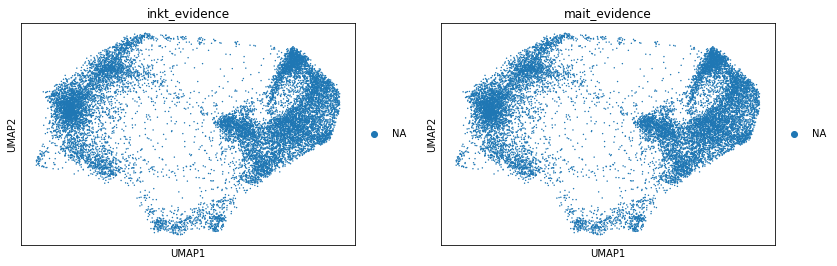

In [15]:
sc.pl.umap(adata, color=["inkt_evidence", "mait_evidence"])

In [16]:
ir.pp.ir_neighbors(BCR_adata, receptor_arms="all", dual_ir="primary_only")
ir.tl.define_clonotypes(BCR_adata)

100%|██████████| 11194/11194 [00:00<00:00, 72232.37it/s]


... storing 'clonotype' as categorical


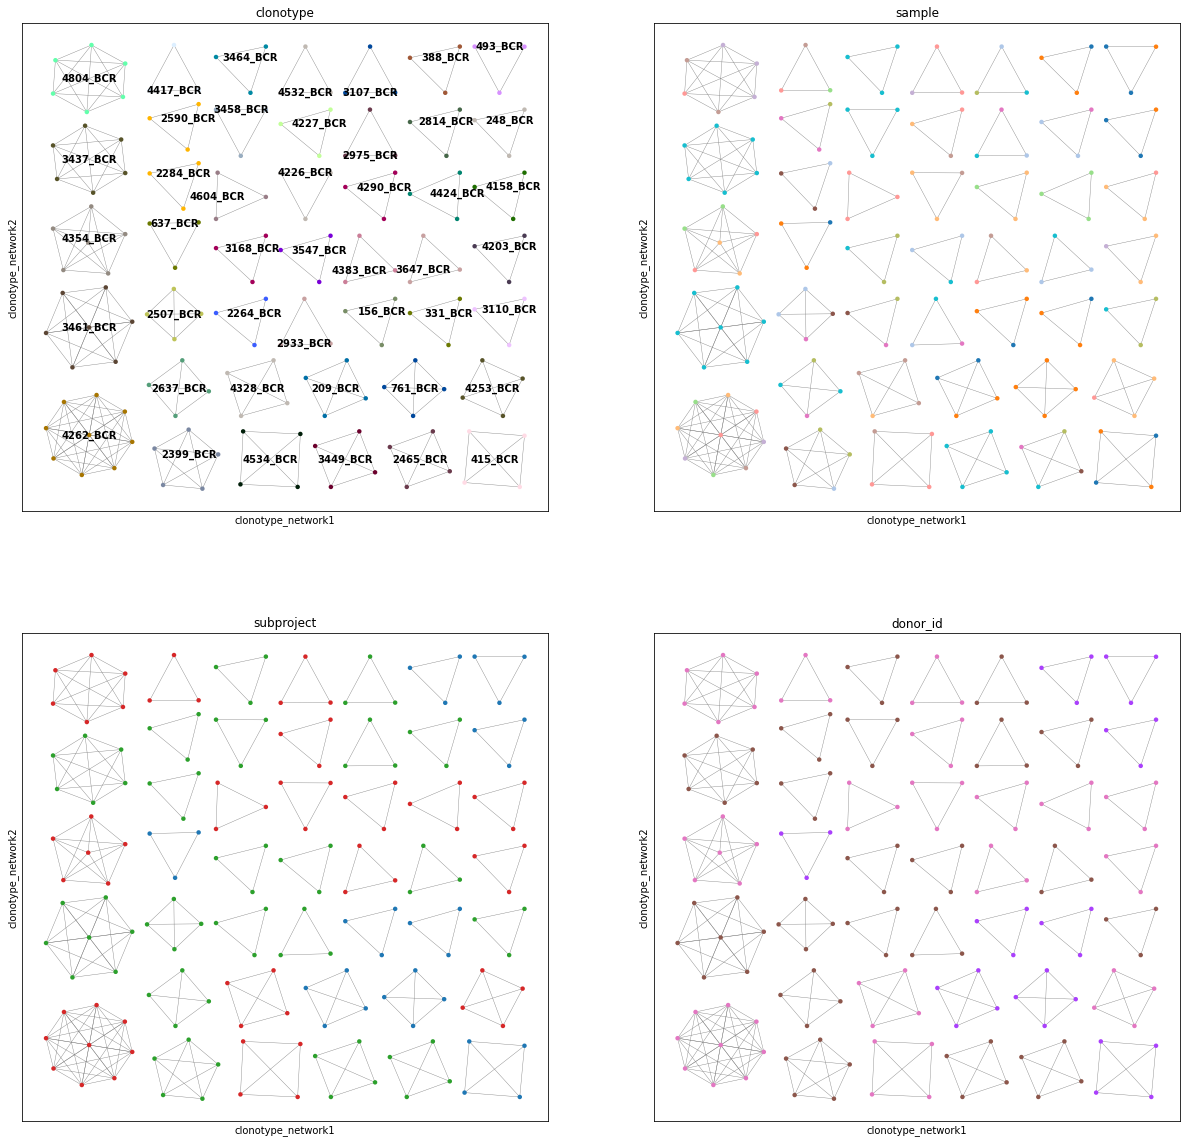

In [17]:
ir.tl.clonotype_network(BCR_adata, min_size=3, sequence = "nt", metric="identity")
ir.pl.clonotype_network(
    BCR_adata,
    color=["clonotype", "sample", "subproject", "donor_id"],
    size=80,
    ncols=2,
    legend_loc=["on data", "none", "lower center", "lower center"]
    
)
plt.show()

array([<AxesSubplot:title={'center':'subproject'}, xlabel='clonotype_network1', ylabel='clonotype_network2'>],
      dtype=object)

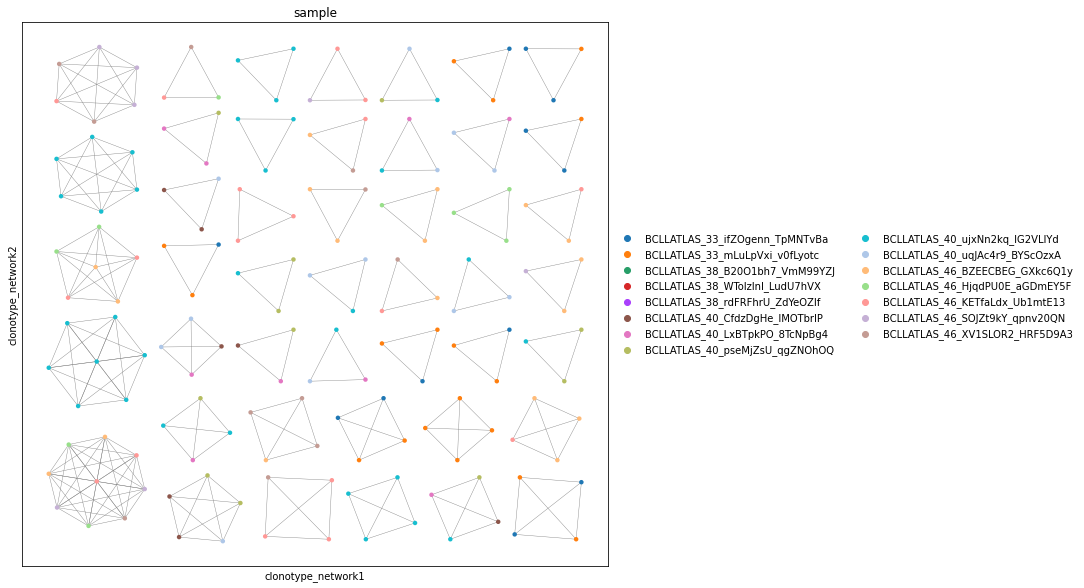

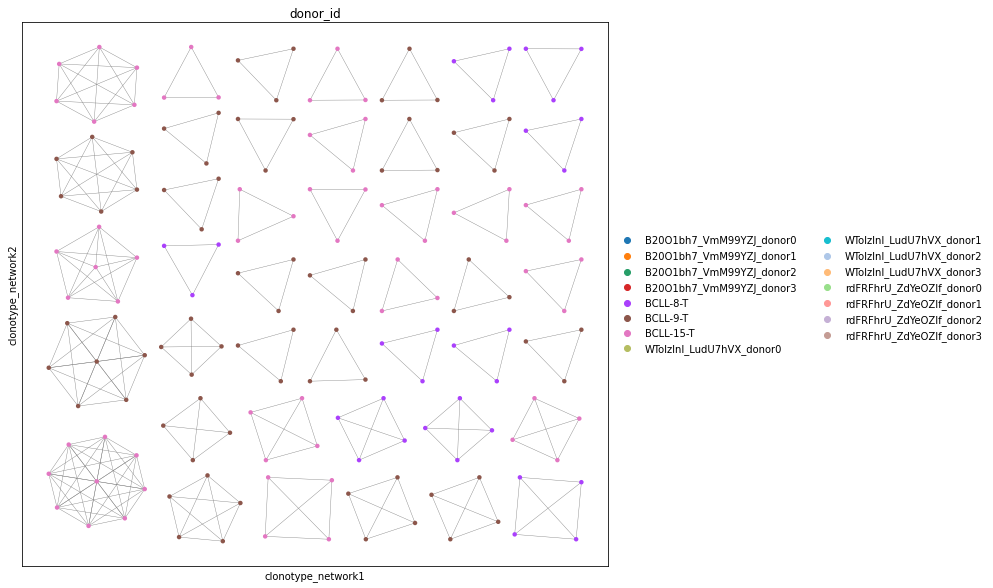

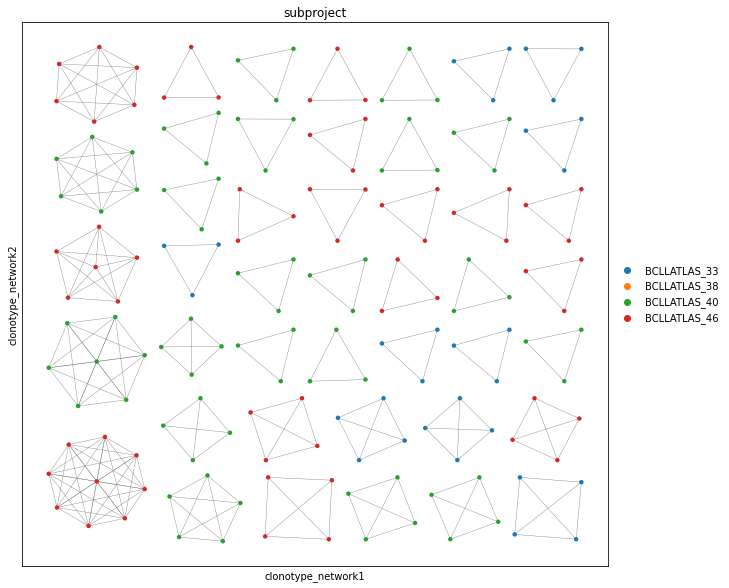

In [18]:
ir.pl.clonotype_network(BCR_adata, color="sample", size=80, panel_size=(10, 10))
ir.pl.clonotype_network(BCR_adata, color="donor_id", size=80, panel_size=(10, 10))
ir.pl.clonotype_network(BCR_adata, color="subproject", size=80, panel_size=(10, 10))

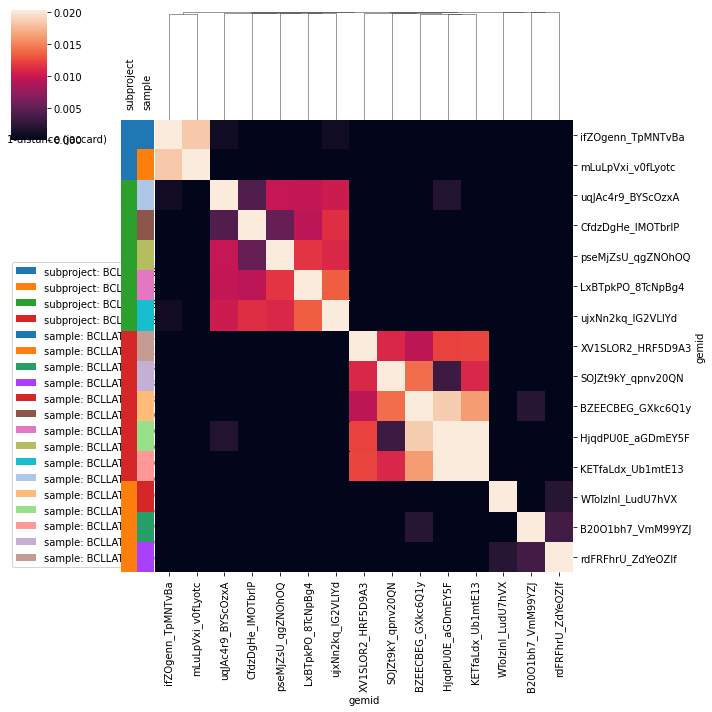

In [19]:
# using clonotype NT sequence
ir.tl.repertoire_overlap(BCR_adata, 
                         groupby="gemid", 
                         target_col="clonotype",
                         overlap_measure="jaccard"
                        )
ax = ir.pl.repertoire_overlap(BCR_adata, 
                              groupby="gemid", 
                              heatmap_cats=["subproject", "sample"],
                              overlap_measure="jaccard",
                              dendro_only=False,
                             )
plt.show()

Initializing IrNeighbors object...
Finished initalizing IrNeighbors object.  (0:00:00)
Computing VJ pairwise distances...
Finished computing VJ pairwise distances. (0:00:00)
Computing VDJ pairwise distances...
Finished computing VDJ pairwise distances. (0:00:00)
Started comstructing VJ coord-dictionary...
100%|██████████| 3531/3531 [00:00<00:00, 29059.10it/s]
Finished constructing VJ coord-dictionary (0:00:00)
Started comstructing VDJ coord-dictionary...
100%|██████████| 4228/4228 [00:00<00:00, 76047.18it/s]
Finished constructing VDJ coord-dictionary (0:00:00)
Constructing cell x cell distance matrix...
100%|██████████| 17744/17744 [00:00<00:00, 168361.58it/s]
Finished constructing cell x cell distance matrix.  (0:00:00)
... storing 'ct_cluster_aa_identity' as categorical


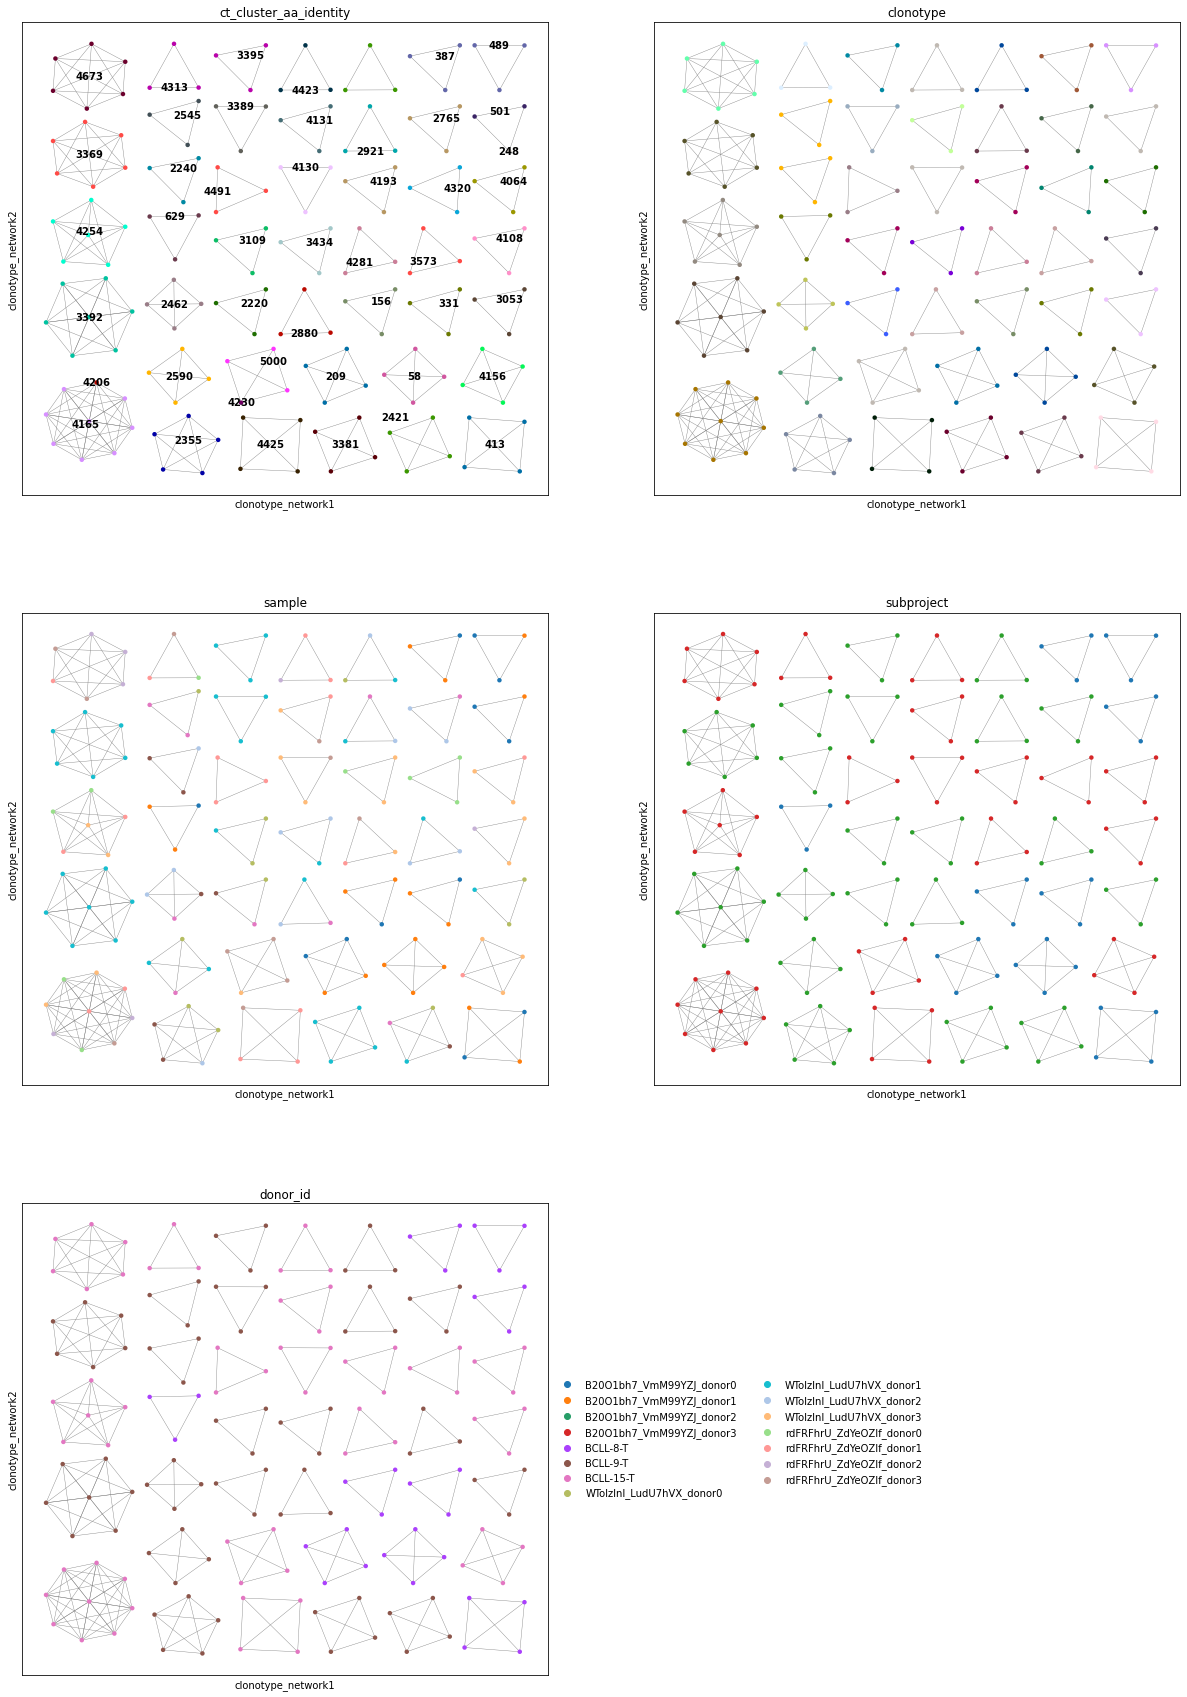

In [20]:
sc.settings.verbosity = 4
ir.pp.ir_neighbors(BCR_adata,metric="identity",sequence="aa",cutoff=15,receptor_arms="all",dual_ir="all",)
ir.tl.define_clonotype_clusters(BCR_adata, partitions="connected", sequence="aa", metric="identity", within_group=None)
ir.pl.clonotype_network(
    BCR_adata,
    color=["ct_cluster_aa_identity", "clonotype", "sample", "subproject", "donor_id"],
    size=80,
    ncols=2,
    legend_loc=["on data", "none", "lower center", "lower center", "right margin"]
    
)
plt.show()

array([<AxesSubplot:title={'center':'subproject'}, xlabel='clonotype_network1', ylabel='clonotype_network2'>],
      dtype=object)

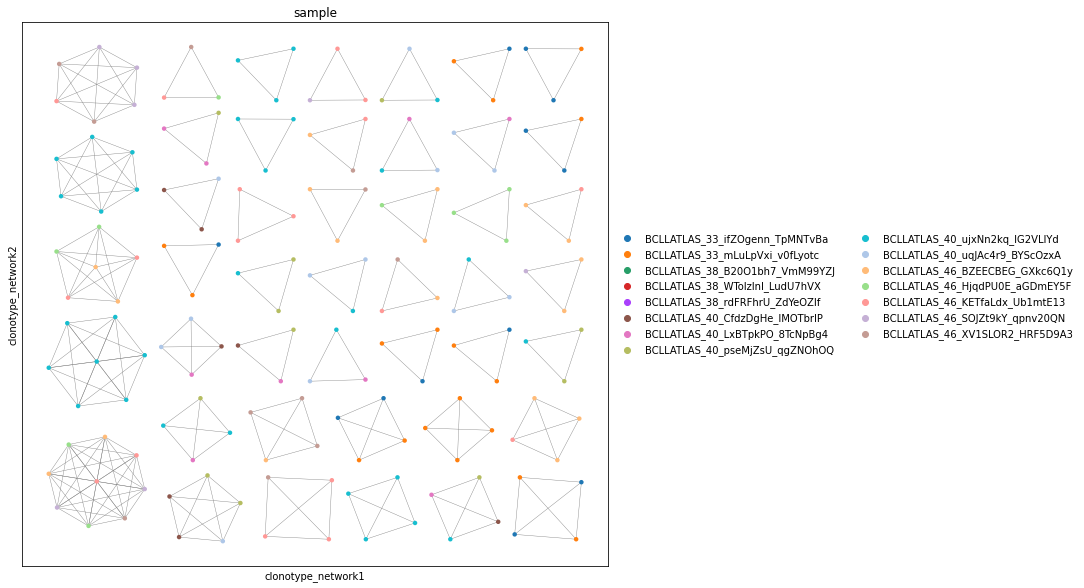

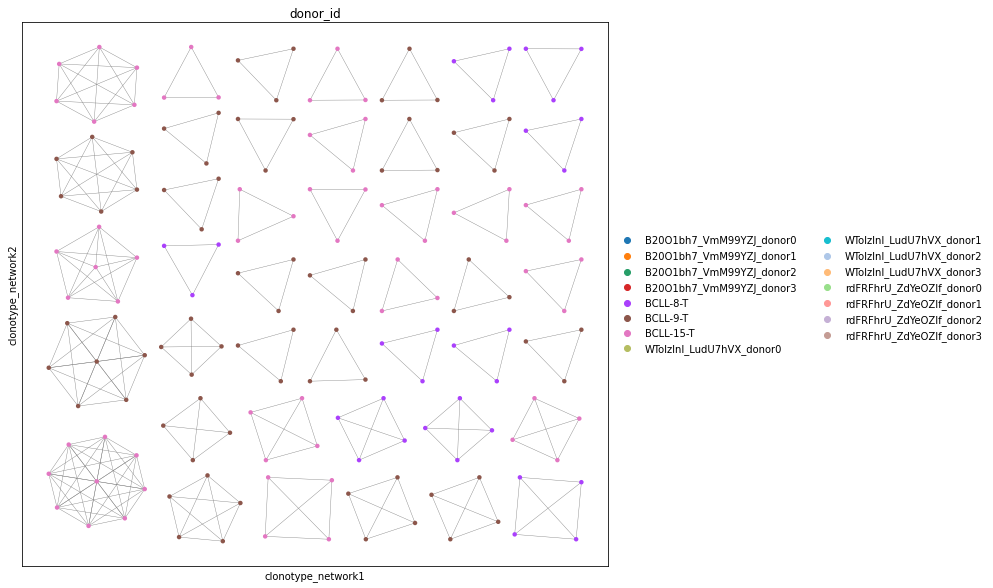

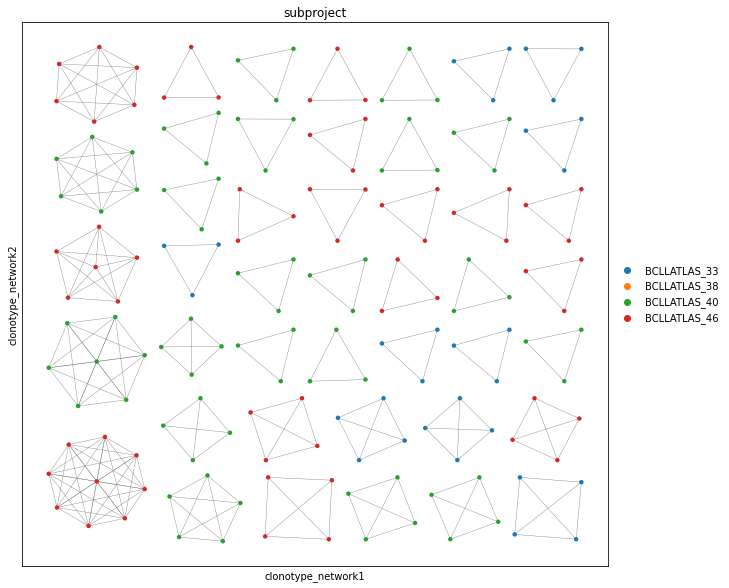

In [21]:
ir.pl.clonotype_network(BCR_adata, color="sample", size=80, panel_size=(10, 10))
ir.pl.clonotype_network(BCR_adata, color="donor_id", size=80, panel_size=(10, 10))
ir.pl.clonotype_network(BCR_adata, color="subproject", size=80, panel_size=(10, 10))

In [22]:
sc.settings.verbosity = 4
ir.pp.ir_neighbors(BCR_adata,metric="alignment",sequence="aa",cutoff=10,receptor_arms="all",dual_ir="all",)
ir.tl.define_clonotype_clusters(BCR_adata, partitions="connected", sequence="aa", metric="alignment", within_group=None)

Initializing IrNeighbors object...
Finished initalizing IrNeighbors object.  (0:00:00)
Computing VJ pairwise distances...
100%|██████████| 2556/2556 [00:17<00:00, 146.91it/s]
Finished computing VJ pairwise distances. (0:00:17)
Computing VDJ pairwise distances...
100%|██████████| 3655/3655 [00:28<00:00, 130.37it/s]
Finished computing VDJ pairwise distances. (0:00:28)
Started comstructing VJ coord-dictionary...
100%|██████████| 15220/15220 [00:00<00:00, 21476.53it/s]
Finished constructing VJ coord-dictionary (0:00:00)
Started comstructing VDJ coord-dictionary...
100%|██████████| 5012/5012 [00:00<00:00, 76149.85it/s]
Finished constructing VDJ coord-dictionary (0:00:00)
Constructing cell x cell distance matrix...
100%|██████████| 133892/133892 [00:00<00:00, 212570.95it/s]
Finished constructing cell x cell distance matrix.  (0:00:00)
    Started converting distances to connectivities. 
    Finished converting distances to connectivities.  (0:00:00)


In [23]:
ir.tl.clonotype_network(BCR_adata, min_size=3, sequence="aa", metric="alignment")

... storing 'ct_cluster_aa_alignment' as categorical


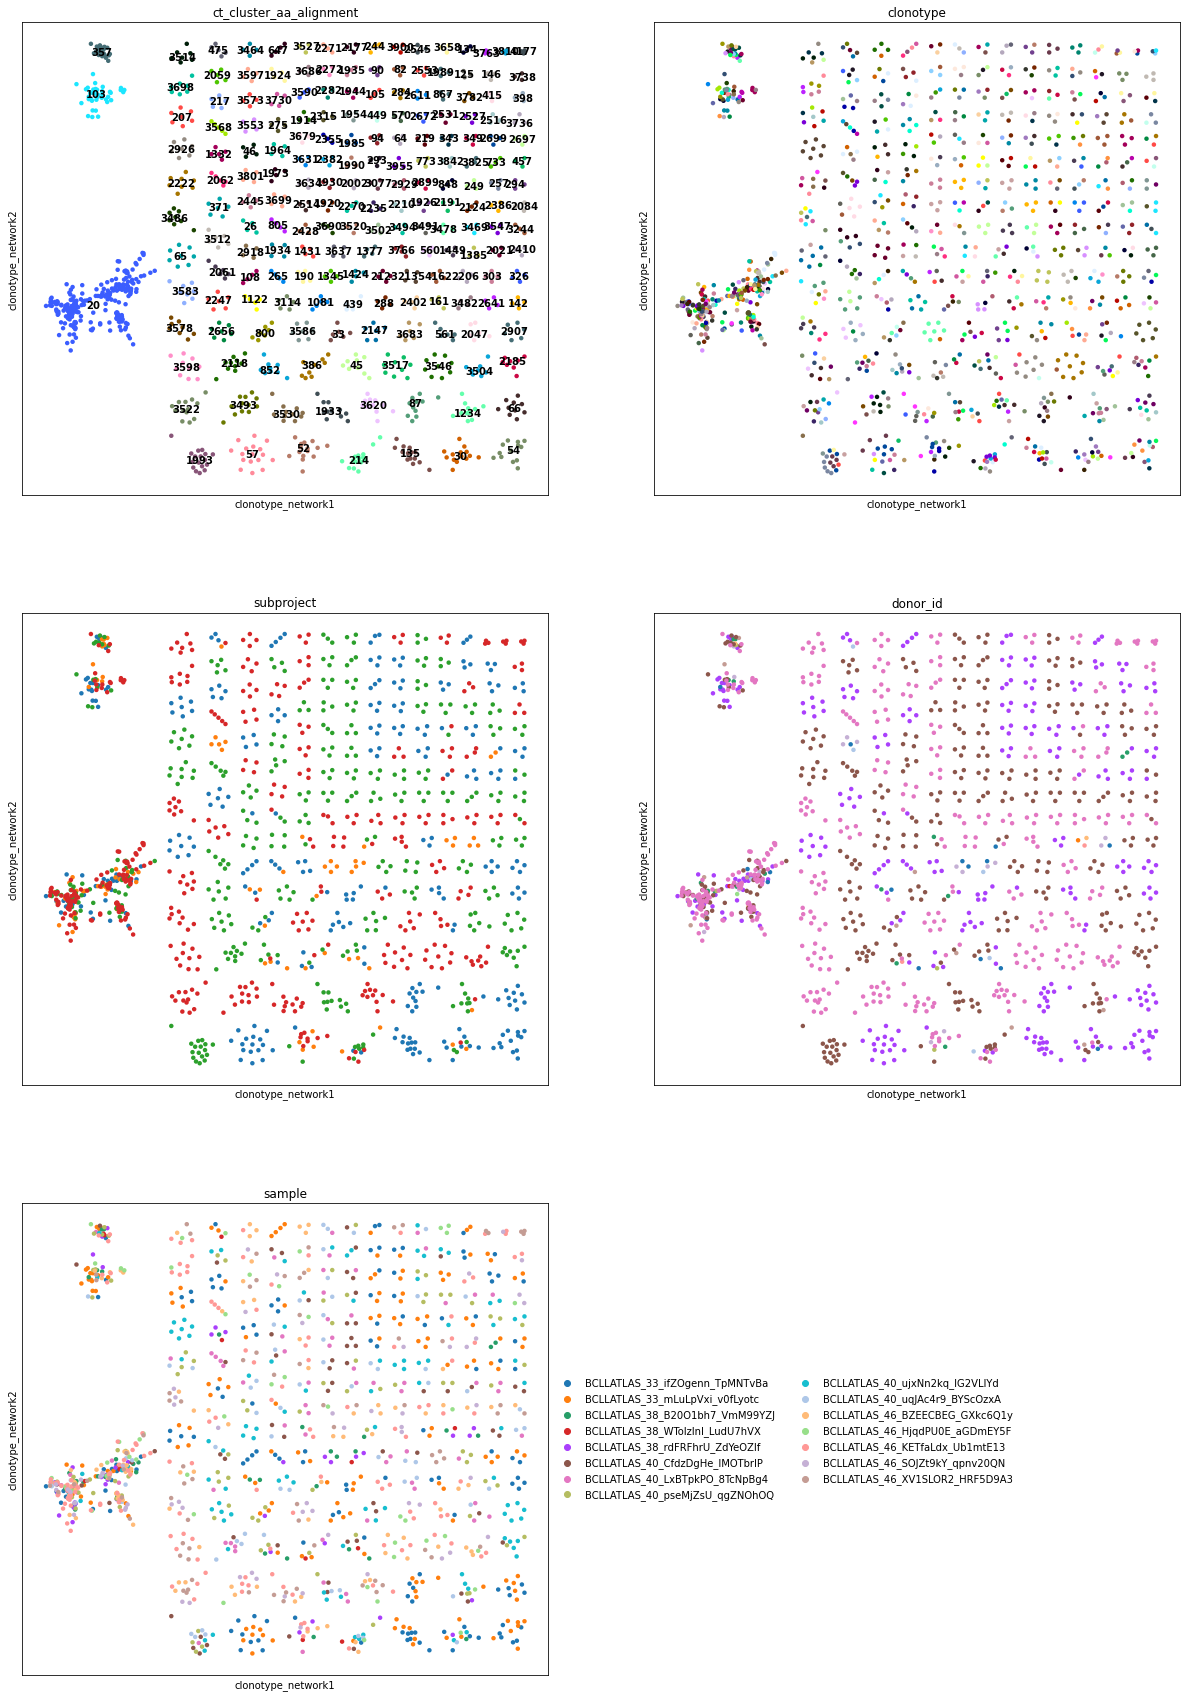

In [24]:
ir.pl.clonotype_network(
    BCR_adata,
    color=["ct_cluster_aa_alignment", "clonotype", "subproject", "donor_id", "sample"],
    size=80,
    ncols=2,
    legend_loc=["on data", "none", "lower center", "lower center", "right margin"]
    
)
plt.show()

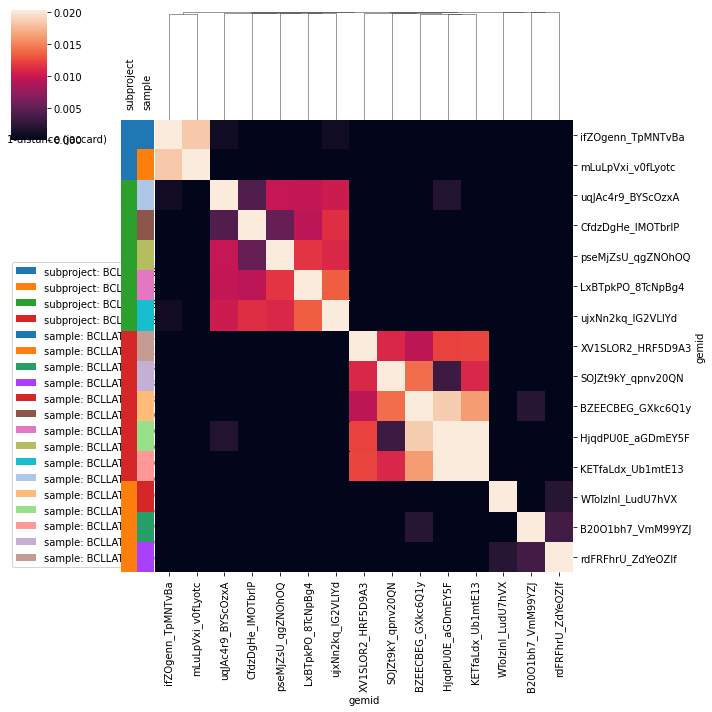

In [25]:
# using clonotype AA sequence
ir.tl.repertoire_overlap(BCR_adata, 
                         groupby="gemid", 
                         target_col="clonotype",
                         overlap_measure="jaccard"
                        )
ax = ir.pl.repertoire_overlap(BCR_adata, 
                              groupby="gemid", 
                              heatmap_cats=["subproject", "sample"],
                              overlap_measure="jaccard",
                              dendro_only=False,
                              added_key='repertoire_overlap',
                              size=30,
                              legend_loc='upper right',
                             )
plt.show()

array([<AxesSubplot:title={'center':'sample'}, xlabel='clonotype_network1', ylabel='clonotype_network2'>],
      dtype=object)

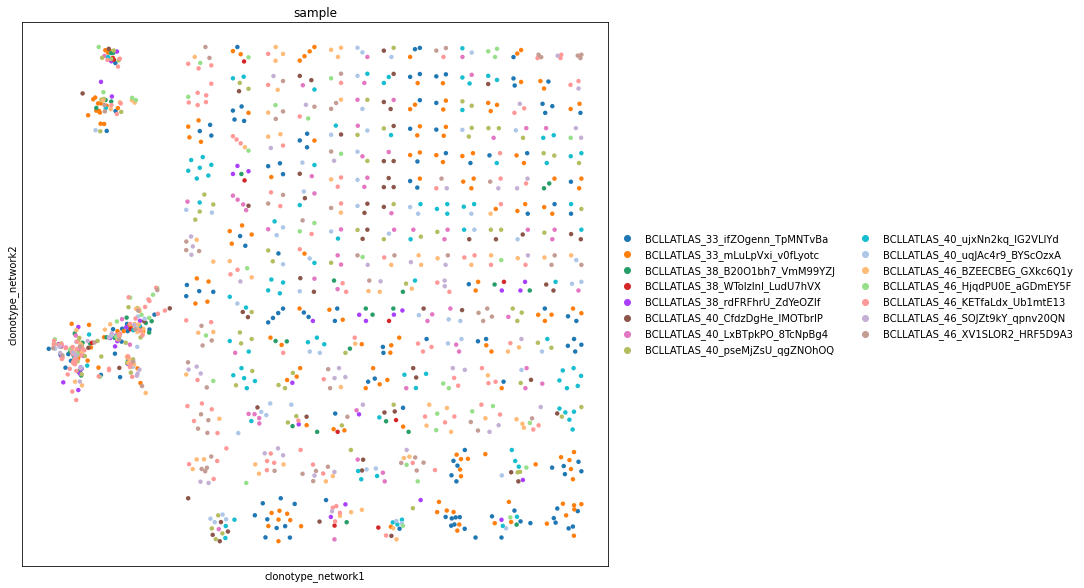

In [26]:
ir.pl.clonotype_network(BCR_adata, color="sample", size=80, panel_size=(10, 10))

array([<AxesSubplot:title={'center':'donor_id'}, xlabel='clonotype_network1', ylabel='clonotype_network2'>],
      dtype=object)

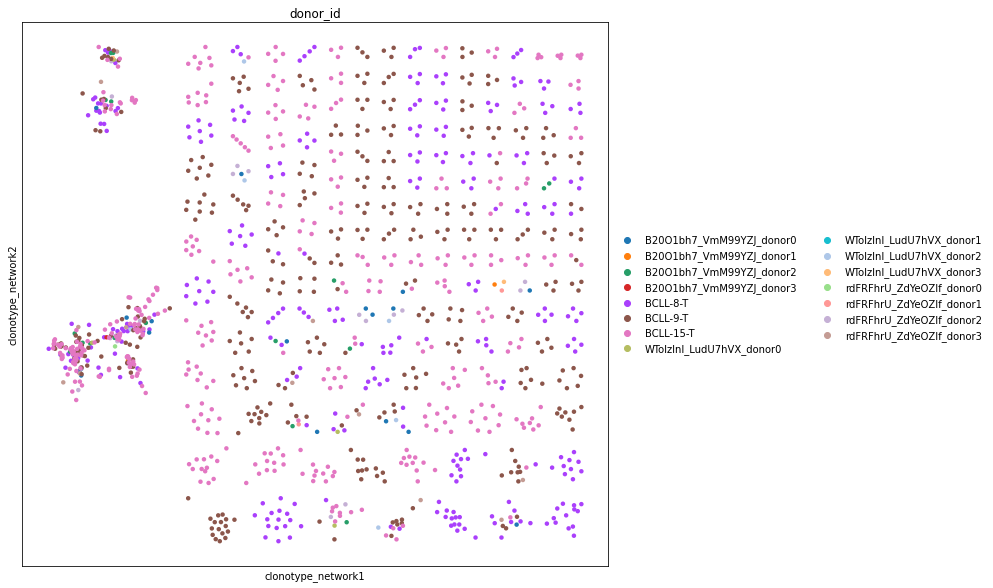

In [27]:
ir.pl.clonotype_network(BCR_adata, color="donor_id", size=80, panel_size=(10, 10))

array([<AxesSubplot:title={'center':'subproject'}, xlabel='clonotype_network1', ylabel='clonotype_network2'>],
      dtype=object)

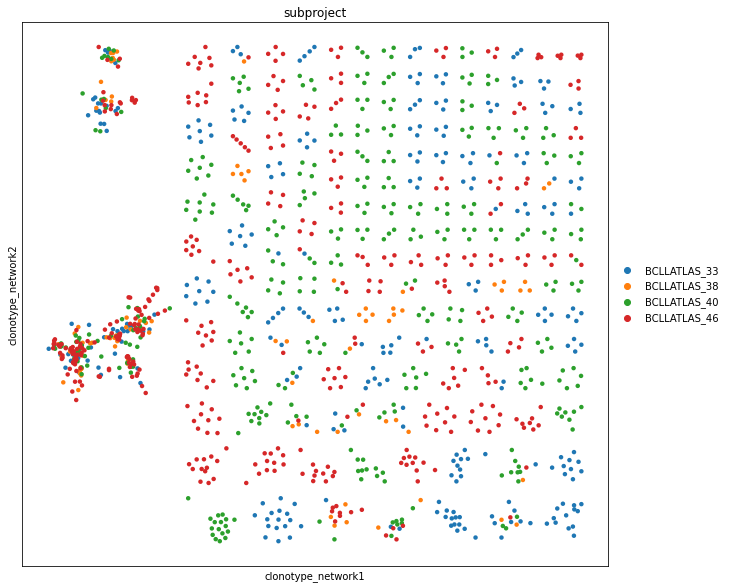

In [28]:
ir.pl.clonotype_network(BCR_adata, color="subproject", size=80, panel_size=(10, 10))

In [29]:
top_cluster=collections.Counter(BCR_adata.obs["ct_cluster_aa_alignment"].to_list()).most_common(1)[0]
BCR_adata.obs.loc[BCR_adata.obs["ct_cluster_aa_alignment"] == top_cluster[0],["IR_VJ_1_cdr3","IR_VJ_2_cdr3","IR_VDJ_1_cdr3","IR_VDJ_2_cdr3","receptor_subtype",],]

IR_VJ_1_cdr3 IR_VJ_2_cdr3  \
BCLLATLAS_33_ifZOgenn_TpMNTvBa_AACTCCCAGGTGCTTT-1  CHKYGSPPYTF         None   
BCLLATLAS_33_ifZOgenn_TpMNTvBa_ACGCAGCAGTTAAGTG-1  CQQYNNWPWTF         None   
BCLLATLAS_33_ifZOgenn_TpMNTvBa_ACTGAACGTCATACTG-1  CQQYDVYPWTF         None   
BCLLATLAS_33_ifZOgenn_TpMNTvBa_AGCTTGAGTTCTCATT-1  CQQYDLYPWTF         None   
BCLLATLAS_33_ifZOgenn_TpMNTvBa_CACACTCGTAGAAAGG-1  CQQSYTTPITF         None   
...                                                        ...          ...   
BCLLATLAS_46_XV1SLOR2_HRF5D9A3_CTGCCTATCGAACGGA-1  CQQYNHWPRTF         None   
BCLLATLAS_46_XV1SLOR2_HRF5D9A3_GGTGCGTAGCCGTCGT-1  CQQYATSPYAF         None   
BCLLATLAS_46_XV1SLOR2_HRF5D9A3_GTACTCCCACTCTGTC-1  CQQRSKWPKTF         None   
BCLLATLAS_46_XV1SLOR2_HRF5D9A3_TGACTTTAGCCCAACC-1  CQQSYSAPYTF         None   
BCLLATLAS_46_XV1SLOR2_HRF5D9A3_TGCCCTAAGATCGATA-1  CHHTYSAPRTF         None   

                                                  IR_VDJ_1_cdr3 IR_VDJ_2_cdr3  \
BCLLATLAS_33_ifZOgenn_TpMNTvBa_AACTCCCAGGTGCTTT-1          None          None   
BCLLATLAS_33_ifZOgenn_TpMNTvBa_ACGCAGCAGTTAAGTG-1          None          None   
BCLLATLAS_33_ifZOgenn_TpMNTvBa_ACTGAACGTCATACTG-1          None          None   
BCLLATLAS_33_ifZOgenn_TpMNTvBa_AGCTTGAGTTCTCATT-1          None          None   
BCLLATLAS_33_ifZOgenn_TpMNTvBa_CACACTCGTAGAAAGG-1          None          None   
...                                                         ...           ...   
BCLLATLAS_46_XV1SLOR2_HRF5D9A3_CTGCCTATCGAACGGA-1          None          None   
BCLLATLAS_46_XV1SLOR2_HRF5D9A3_GGTGCGTAGCCGTCGT-1          None          None   
BCLLATLAS_46_XV1SLOR2_HRF5D9A3_GTACTCCCACTCTGTC-1          None          None   
BCLLATLAS_46_XV1SLOR2_HRF5D9A3_TGACTTTAGCCCAACC-1          None          None   
BCLLATLAS_46_XV1SLOR2_HRF5D9A3_TGCCCTAAGATCGATA-1          None          None   

                                                  receptor_subtype  
BCLLATLAS_33_ifZOgenn_TpMNTvBa_AACTCCCAGGTGCTTT-1          IGH+IGK  
BCLLATLAS_33_ifZOgenn_TpMNTvBa_ACGCAGCAGTTAAGTG-1          IGH+IGK  
BCLLATLAS_33_ifZOgenn_TpMNTvBa_ACTGAACGTCATACTG-1          IGH+IGK  
BCLLATLAS_33_ifZOgenn_TpMNTvBa_AGCTTGAGTTCTCATT-1          IGH+IGK  
BCLLATLAS_33_ifZOgenn_TpMNTvBa_CACACTCGTAGAAAGG-1          IGH+IGK  
...                                                            ...  
BCLLATLAS_46_XV1SLOR2_HRF5D9A3_CTGCCTATCGAACGGA-1          IGH+IGK  
BCLLATLAS_46_XV1SLOR2_HRF5D9A3_GGTGCGTAGCCGTCGT-1          IGH+IGK  
BCLLATLAS_46_XV1SLOR2_HRF5D9A3_GTACTCCCACTCTGTC-1          IGH+IGK  
BCLLATLAS_46_XV1SLOR2_HRF5D9A3_TGACTTTAGCCCAACC-1          IGH+IGK  
BCLLATLAS_46_XV1SLOR2_HRF5D9A3_TGCCCTAAGATCGATA-1          IGH+IGK  

[247 rows x 5 columns]

In [30]:
ir.tl.define_clonotype_clusters(BCR_adata,sequence="aa",metric="alignment",same_v_gene="primary_only",key_added="ct_cluster_aa_alignment_same_v",)

In [31]:
# find clonotypes with more than one `clonotype_same_v`
ct_different_v = BCR_adata.obs.groupby("ct_cluster_aa_alignment").apply(lambda x: x["ct_cluster_aa_alignment_same_v"].unique().size > 1)
ct_different_v = ct_different_v[ct_different_v].index.values
ct_different_v

['9', '20', '33', '45', '52', ..., '3801', '3850', '3855', '4098', '4177']
Length: 64
Categories (4270, object): ['0', '1', '2', '3', ..., '4266', '4267', '4268', '4269']

In [32]:
# Display the first 2 clonotypes with different v genes
BCR_adata.obs.loc[BCR_adata.obs["ct_cluster_aa_alignment"].isin(ct_different_v[:2]),["clonotype","ct_cluster_aa_alignment","ct_cluster_aa_alignment_same_v","IR_VJ_1_v_gene","IR_VDJ_1_v_gene",],].sort_values("ct_cluster_aa_alignment").drop_duplicates().reset_index(drop=True)

clonotype ct_cluster_aa_alignment ct_cluster_aa_alignment_same_v  \
0       9_BCR                       9        9_IGLV6-57_IGHV3-33_BCR   
1       9_BCR                       9         9_IGLV6-57_IGHV3-7_BCR   
2    4404_BCR                      20            20_IGKV3-15_nan_BCR   
3    4409_BCR                      20           20_IGKV1D-13_nan_BCR   
4    4416_BCR                      20             20_IGKV4-1_nan_BCR   
..        ...                     ...                            ...   
224  2804_BCR                      20            20_IGKV3-11_nan_BCR   
225  2821_BCR                      20           20_IGKV1-NL1_nan_BCR   
226  2935_BCR                      20           20_IGKV1-NL1_nan_BCR   
227  3004_BCR                      20            20_IGKV3-20_nan_BCR   
228  4417_BCR                      20            20_IGKV1-39_nan_BCR   

    IR_VJ_1_v_gene IR_VDJ_1_v_gene  
0         IGLV6-57        IGHV3-33  
1         IGLV6-57         IGHV3-7  
2         IGKV3-15             NaN  
3        IGKV1D-13             NaN  
4          IGKV4-1             NaN  
..             ...             ...  
224       IGKV3-11             NaN  
225      IGKV1-NL1             NaN  
226      IGKV1-NL1             NaN  
227       IGKV3-20             NaN  
228       IGKV1-39             NaN  

[229 rows x 5 columns]

... storing 'ct_cluster_aa_alignment_same_v' as categorical
... storing 'clonal_expansion' as categorical


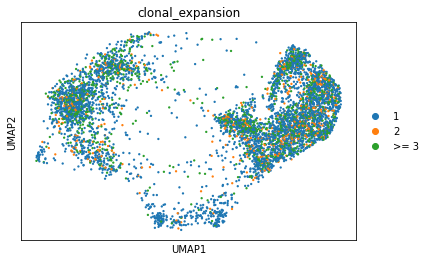

In [33]:
ir.tl.clonal_expansion(BCR_adata, target_col = "ct_cluster_aa_alignment_same_v")
sc.pl.umap(BCR_adata, color=["clonal_expansion"])

<AxesSubplot:>

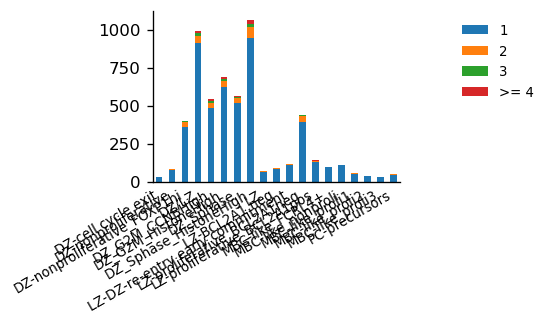

In [34]:
ir.pl.clonal_expansion(BCR_adata, groupby="cluster", clip_at=4, normalize=False)

<AxesSubplot:>

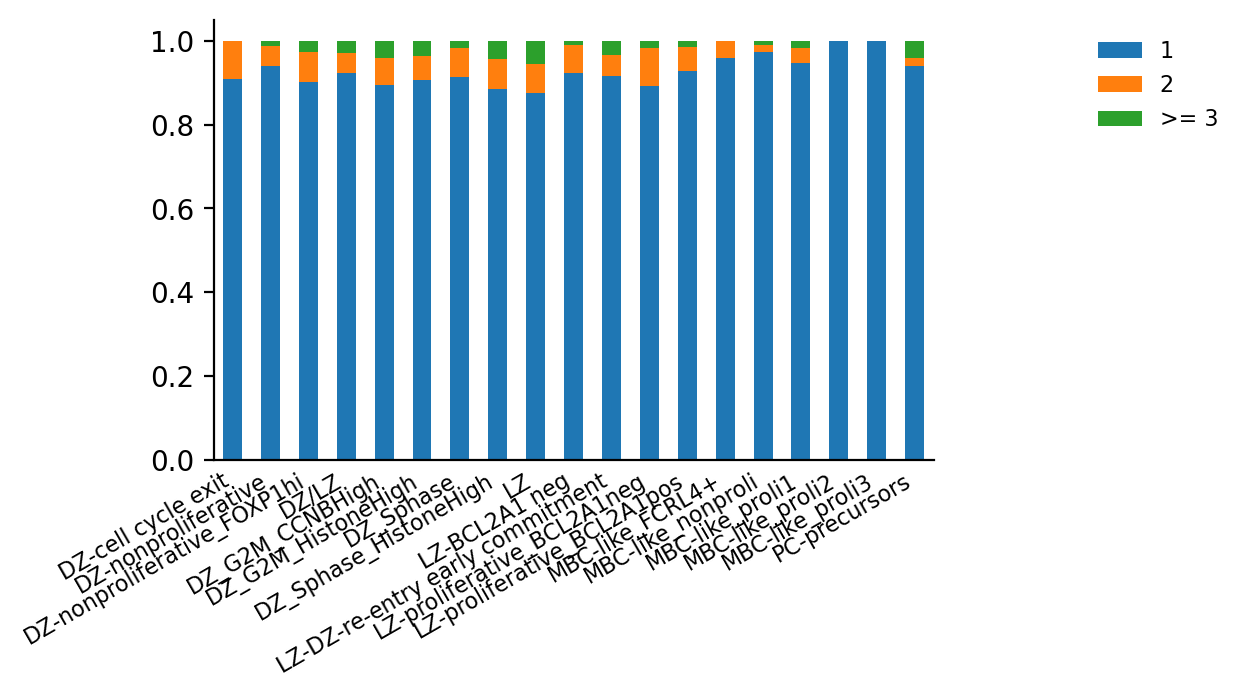

In [35]:
ir.pl.clonal_expansion(BCR_adata, "cluster", fig_kws={"dpi": 200})

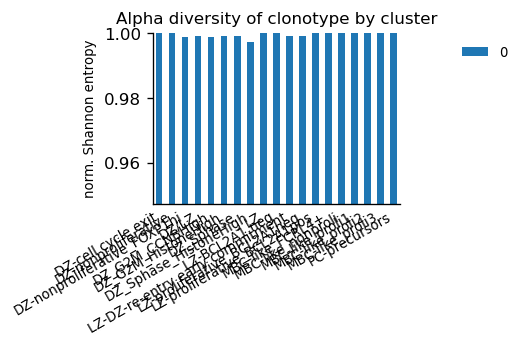

In [36]:
ax = ir.pl.alpha_diversity(BCR_adata, groupby="cluster")

<AxesSubplot:title={'center':'Number of cells in clonotype by cluster'}, xlabel='clonotype', ylabel='Number of cells'>

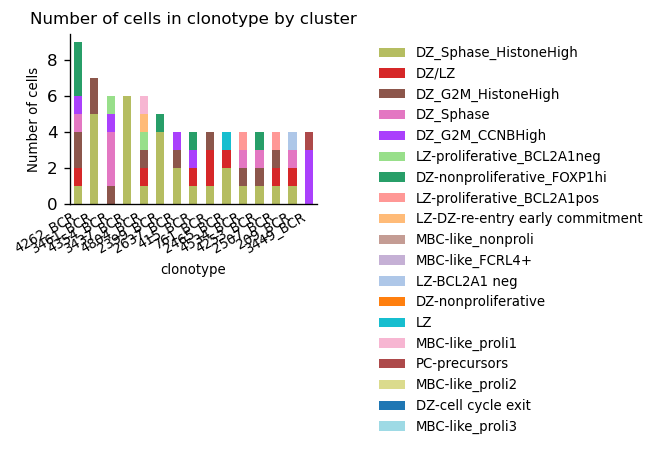

In [37]:
ir.pl.group_abundance(BCR_adata, groupby="clonotype",target_col="cluster", max_cols=15)

<AxesSubplot:title={'center':'Fraction of cluster in each clonotype'}, xlabel='clonotype', ylabel='Fraction of cells in sample'>

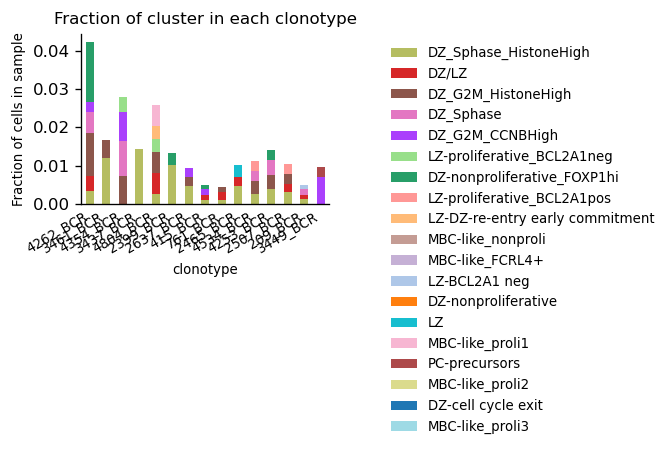

In [38]:
ir.pl.group_abundance(BCR_adata, groupby="clonotype",target_col="cluster", max_cols=15, normalize="sample")

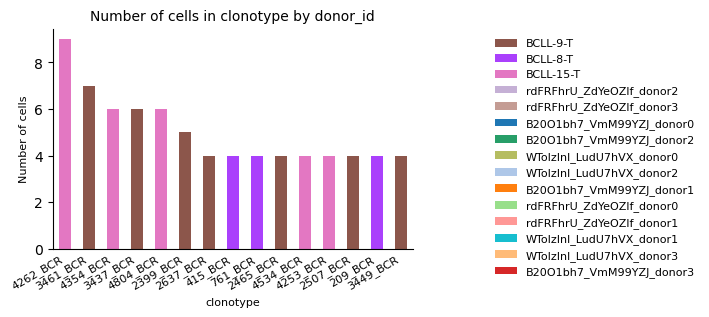

In [39]:
ax = ir.pl.group_abundance(BCR_adata, groupby="clonotype", target_col="donor_id", max_cols=15, fig_kws={"dpi": 100})

<AxesSubplot:title={'center':'Fraction of has_ir in each IR_VJ_1_v_gene'}, xlabel='IR_VJ_1_v_gene', ylabel='Fraction of cells in has_ir'>

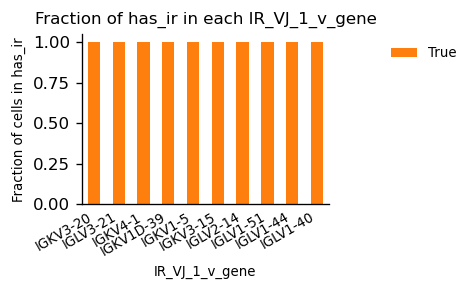

In [40]:
ir.pl.group_abundance(BCR_adata, groupby="IR_VJ_1_v_gene", normalize=True, max_cols=10)

/home/srashmi/anaconda3/lib/python3.7/site-packages/anndata/compat/__init__.py:215: FutureWarning: During AnnData slicing, found matrix at .uns['ir_neighbors_nt_identity']['connectivities'] that happens to be dimensioned at n_obs×n_obs (5608×5608).

These matrices should now be stored in the .obsp attribute.
This slicing behavior will be removed in anndata 0.8.
  FutureWarning,
/home/srashmi/anaconda3/lib/python3.7/site-packages/anndata/compat/__init__.py:215: FutureWarning: During AnnData slicing, found matrix at .uns['ir_neighbors_nt_identity']['distances'] that happens to be dimensioned at n_obs×n_obs (5608×5608).

These matrices should now be stored in the .obsp attribute.
This slicing behavior will be removed in anndata 0.8.
  FutureWarning,
/home/srashmi/anaconda3/lib/python3.7/site-packages/anndata/compat/__init__.py:215: FutureWarning: During AnnData slicing, found matrix at .uns['ir_neighbors_aa_identity']['connectivities'] that happens to be dimensioned at n_obs×n_obs (5608×5

<AxesSubplot:title={'center':'Fraction of IR_VDJ_1_v_gene in each cluster'}, xlabel='cluster', ylabel='Fraction of cells in IR_VDJ_1_v_gene'>

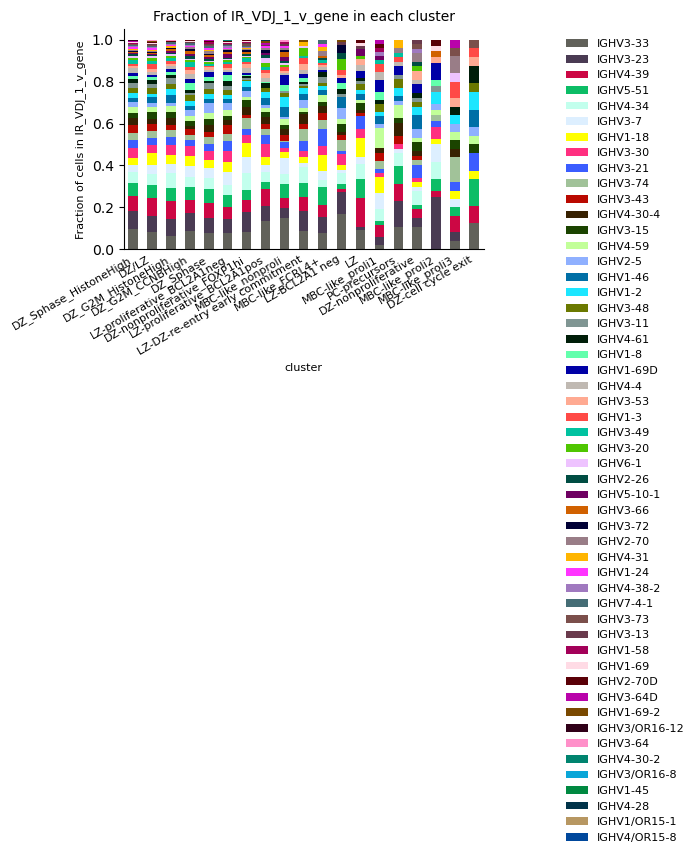

In [41]:
all_gene=BCR_adata.obs["IR_VDJ_1_v_gene"].to_list()
gene_list=[t[0] for t in collections.Counter(all_gene).most_common(10) if str(t[0]) != 'nan']

ir.pl.group_abundance(BCR_adata[BCR_adata.obs["IR_VDJ_1_v_gene"].isin(all_gene),:,],groupby="cluster",target_col="IR_VDJ_1_v_gene",normalize=True,fig_kws={"dpi": 100},)

In [42]:
df = pd.DataFrame(BCR_adata.obs.reset_index()[["IR_VDJ_1_v_gene","cluster"]])
#df=df.groupby(["cluster", "IR_VDJ_1_v_gene"]).size().reset_index(name="freq")
#df.groupby(['cluster',"IR_VDJ_1_v_gene"])['freq'].nlargest(2)
df.groupby(["cluster"])["IR_VDJ_1_v_gene"]

<AxesSubplot:>

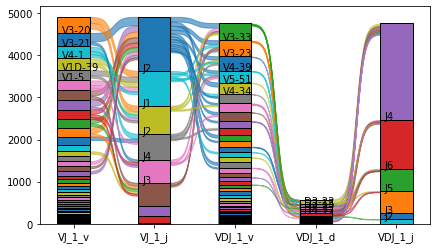

In [43]:
ir.pl.vdj_usage(BCR_adata, full_combination=False, max_segments=None, max_ribbons=30)

In [44]:
clonotype_list = BCR_adata.obs['clonotype'].value_counts()[:15].index.tolist()
clonotype_list

['4262_BCR',
 '3461_BCR',
 '4354_BCR',
 '3437_BCR',
 '4804_BCR',
 '2399_BCR',
 '2637_BCR',
 '415_BCR',
 '761_BCR',
 '2465_BCR',
 '4534_BCR',
 '4253_BCR',
 '2507_BCR',
 '209_BCR',
 '3449_BCR']

<AxesSubplot:>

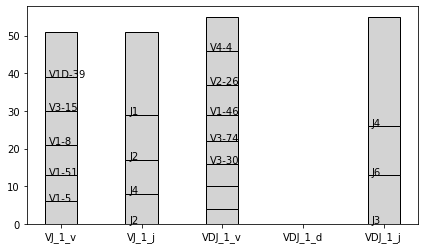

In [45]:
ir.pl.vdj_usage(BCR_adata[BCR_adata.obs["clonotype"].isin(clonotype_list[:10])],max_ribbons=None,max_segments=30,)

<AxesSubplot:title={'center':'Spectratype of IR_VJ_1_cdr3 by cluster'}, xlabel='IR_VJ_1_cdr3 length', ylabel='Number of cells'>

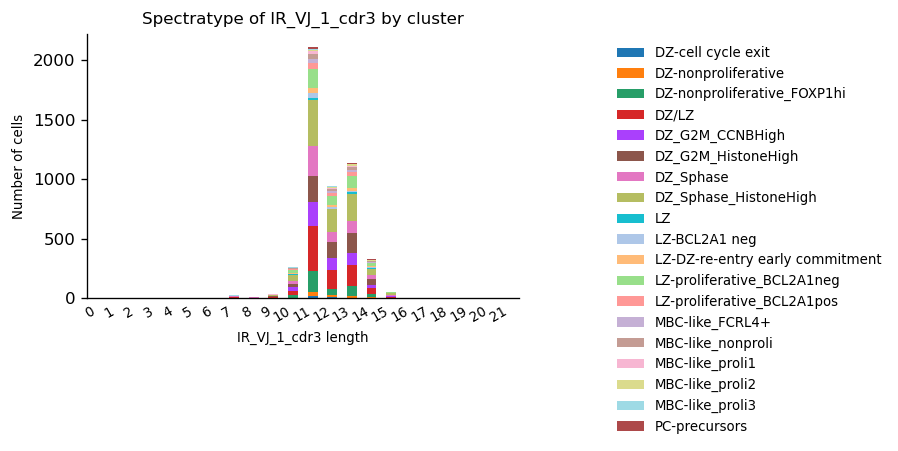

In [46]:
ir.pl.spectratype(BCR_adata, color="cluster", viztype="bar", fig_kws={"dpi": 120})

/home/srashmi/anaconda3/lib/python3.7/site-packages/scirpy/_plotting/base.py:256: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(order)


<AxesSubplot:title={'center':'Spectratype of IR_VJ_1_cdr3 by cluster'}, xlabel='IR_VJ_1_cdr3 length'>

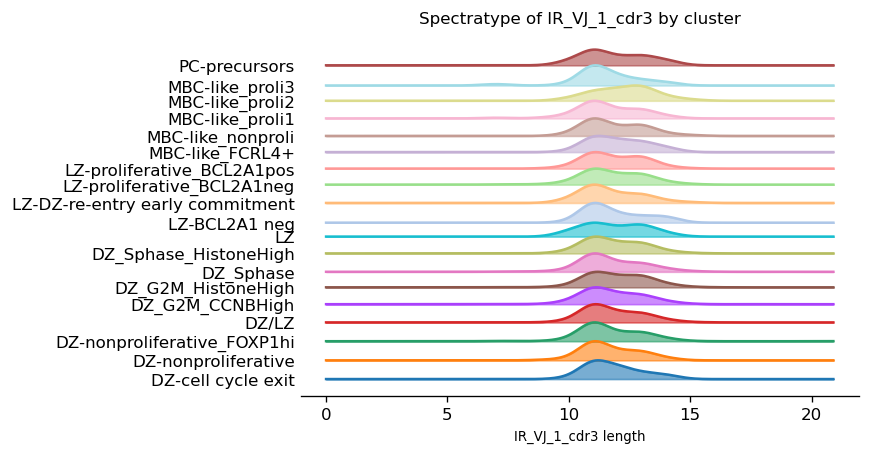

In [47]:
ir.pl.spectratype(BCR_adata,color="cluster",viztype="curve",curve_layout="shifted",fig_kws={"dpi": 120},kde_kws={"kde_norm": False},)

/home/srashmi/anaconda3/lib/python3.7/site-packages/anndata/compat/__init__.py:215: FutureWarning: During AnnData slicing, found matrix at .uns['ir_neighbors_nt_identity']['connectivities'] that happens to be dimensioned at n_obs×n_obs (5608×5608).

These matrices should now be stored in the .obsp attribute.
This slicing behavior will be removed in anndata 0.8.
  FutureWarning,
/home/srashmi/anaconda3/lib/python3.7/site-packages/anndata/compat/__init__.py:215: FutureWarning: During AnnData slicing, found matrix at .uns['ir_neighbors_nt_identity']['distances'] that happens to be dimensioned at n_obs×n_obs (5608×5608).

These matrices should now be stored in the .obsp attribute.
This slicing behavior will be removed in anndata 0.8.
  FutureWarning,
/home/srashmi/anaconda3/lib/python3.7/site-packages/anndata/compat/__init__.py:215: FutureWarning: During AnnData slicing, found matrix at .uns['ir_neighbors_aa_identity']['connectivities'] that happens to be dimensioned at n_obs×n_obs (5608×5

<AxesSubplot:title={'center':'Spectratype of IR_VDJ_1_cdr3 by IR_VDJ_1_v_gene'}, xlabel='IR_VDJ_1_cdr3 length', ylabel='Fraction of cells in sample'>

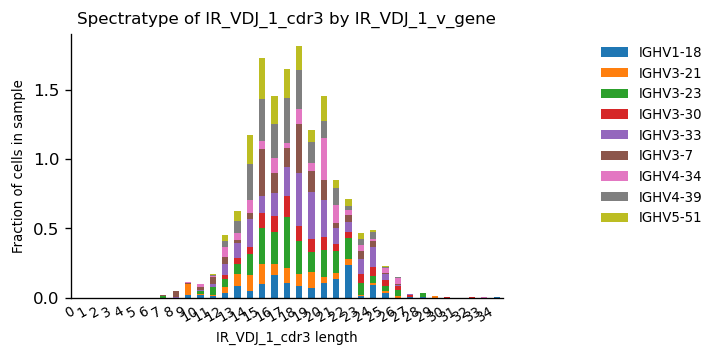

In [48]:
ir.pl.spectratype(BCR_adata[BCR_adata.obs["IR_VDJ_1_v_gene"].isin(gene_list),:,],cdr3_col="IR_VDJ_1_cdr3",color="IR_VDJ_1_v_gene",normalize="sample",fig_kws={"dpi": 120},)

In [49]:
BCR_adata.obs["site"] = BCR_adata.obs["sample"].str.slice(stop=-1)

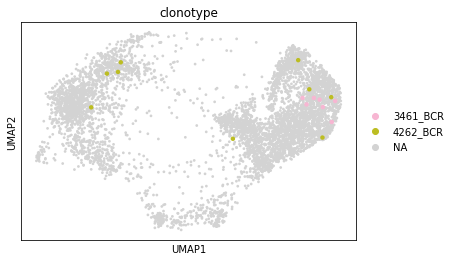

In [69]:
from matplotlib import cm
#len(clonotype_list)
#BCR_adata[BCR_adata.obs['clonotype'].isin(clonotype_list),].obs
clonotype_list = BCR_adata.obs['clonotype'].value_counts()[:15].index.tolist()
sc.pl.umap(BCR_adata,color="clonotype",groups=clonotype_list[:2],size=[80 if c in clonotype_list[:2] else 30 for c in BCR_adata.obs["clonotype"]],)

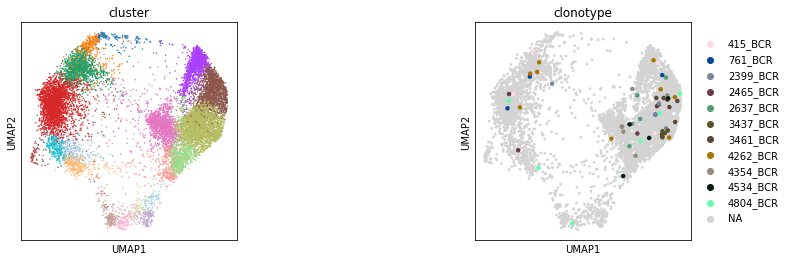

In [51]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4), gridspec_kw={"wspace": 1.1})
sc.pl.umap(adata, color="cluster", ax=ax1, show=False, legend_loc = "lower")

sc.pl.umap(BCR_adata,color="clonotype",groups=clonotype_list[:11],ax=ax2,size=[80 if c in clonotype_list[:11] else 30 for c in BCR_adata.obs["clonotype"]],)

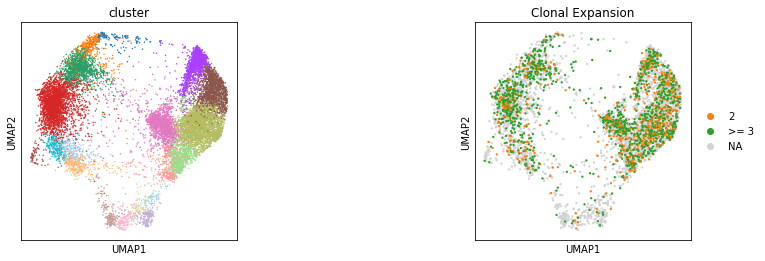

In [52]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4), gridspec_kw={"wspace": 1.1})
sc.pl.umap(adata, color="cluster", ax=ax1, show=False, legend_loc = "lower right")
sc.pl.umap(
    BCR_adata, 
    color=["clonal_expansion"], 
    groups=['2', '>= 3'],
    title="Clonal Expansion", ax=ax2
)

In [53]:
#temp_df=BCR_adata.obs
#total_cells = temp_df.groupby(['sample','seurat_clusters'])['orig.ident'].count().reset_index(name='Total_cells')
#ir_freq=temp_df.groupby(['sample','seurat_clusters'])['has_ir'].apply(lambda x: (x=='True').sum()).reset_index(name='has_ir')
#doublet_freq=temp_df.groupby(['sample','seurat_clusters'])['scrublet_predicted_doublet'].apply(lambda x: (x=='True').sum()).reset_index(name='doublet')
#clonotype_freq=temp_df.groupby(['sample','seurat_clusters'])['clonotype_size'].apply(lambda x: (x>1).sum()).reset_index(name='Clonotype_size_more_than_4')
#df_temp = pd.merge(total_cells, doublet_freq, on=['sample','seurat_clusters'])
#df_temp1 = pd.merge(df_temp, ir_freq, on=['sample','seurat_clusters'])
#df = pd.merge(df_temp1, clonotype_freq, on=['sample','seurat_clusters'])
#df.to_csv('BCR_Summarise_scirpy.csv')
#temp_df.to_csv('BCR_Metadata_scirpy.csv')

In [54]:
temp_df=BCR_adata.obs
temp_df_complete=adata.obs
total_cells = temp_df_complete.groupby(['cluster'])['orig.ident'].count().reset_index(name='Total_cells')
ir_freq=temp_df.groupby(['cluster'])['has_ir'].apply(lambda x: (x=='True').sum()).reset_index(name='has_BCR')
clonotype_freq=temp_df.groupby(['cluster'])['clonotype_size'].apply(lambda x: (x>=3).sum()).reset_index(name='Clonotype_size_more_than_3')
df_temp = pd.merge(total_cells, ir_freq, on=['cluster'])
df = pd.merge(df_temp, clonotype_freq, on=['cluster'])
df['percent_BCR'] = df.apply(lambda row: row.has_BCR / row.Total_cells *100, axis = 1) 
df['percent_clonal_expansion'] = df.apply(lambda row: row.Clonotype_size_more_than_3 / row.has_BCR *100, axis = 1) 
#print(int(df[total_cells].tolist()))
df.to_csv('Summarise_scirpy_bcr.csv')
temp_df.to_csv('scirpy_bcr_obj_df.csv')
temp_df_complete.to_csv('scirpy_bcr_complete_obj_df.csv')
df

cluster  Total_cells  has_BCR  \
0                DZ-cell cycle exit          142       33   
1               DZ-nonproliferative          411       84   
2       DZ-nonproliferative_FOXP1hi         1135      402   
3                             DZ/LZ         2717      988   
4                   DZ_G2M_CCNBHigh         1493      541   
5                DZ_G2M_HistoneHigh         1555      688   
6                         DZ_Sphase         1503      563   
7             DZ_Sphase_HistoneHigh         2526     1066   
8                                LZ          272       72   
9                     LZ-BCL2A1 neg          270       91   
10  LZ-DZ-re-entry early commitment          347      118   
11       LZ-proliferative_BCL2A1neg          892      441   
12       LZ-proliferative_BCL2A1pos          369      141   
13                  MBC-like_FCRL4+          205       98   
14                MBC-like_nonproli          186      110   
15                  MBC-like_proli1          175       56   
16                  MBC-like_proli2           69       38   
17                  MBC-like_proli3           78       28   
18                    PC-precursors           84       50   

    Clonotype_size_more_than_3  percent_BCR  percent_clonal_expansion  
0                            0    23.239437                  0.000000  
1                            1    20.437956                  1.190476  
2                           11    35.418502                  2.736318  
3                           29    36.363636                  2.935223  
4                           22    36.235767                  4.066543  
5                           25    44.244373                  3.633721  
6                           10    37.458417                  1.776199  
7                           46    42.201108                  4.315197  
8                            4    26.470588                  5.555556  
9                            1    33.703704                  1.098901  
10                           4    34.005764                  3.389831  
11                           7    49.439462                  1.587302  
12                           2    38.211382                  1.418440  
13                           0    47.804878                  0.000000  
14                           1    59.139785                  0.909091  
15                           1    32.000000                  1.785714  
16                           0    55.072464                  0.000000  
17                           0    35.897436                  0.000000  
18                           2    59.523810                  4.000000

In [55]:
BCR_adata.obs.to_csv("scirpy_obs_out.csv", sep = "\t")